# Proyek Analisis Data: E-Commerce Public Dataset 
- **Nama:** Ferry Amaludin
- **Email:** ferryamludn@gmail.com
- **ID Dicoding:** ferryamludn

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi pesanan menurut negara bagian?
- Bagaimana nilai pesanan rata-rata bervariasi berdasarkan kategori produk?
- Bagaimana tren total pendapatan dari waktu ke waktu?
- Metode pembayaran apa yang paling umum digunakan?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



```
# This is formatted as code
```

## Data Wrangling

### Gathering Data

In [7]:
#untuk memuat dataset
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')

#menampilkan contoh data
print(orders.head())
print(order_items.head())
print(payments.head())
print(products.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**
- Data ini berisi informasi tentang order_id, customer_id, order_status, order_purchase_timestamp, dan berbagai data yang lain.

### Assessing Data

In [8]:
#memeriksa nilai yang hilang
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(payments.isnull().sum())
print(products.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


**Insight:**
- Beberapa kolom memiliki nilai yang hilang

### Cleaning Data

In [9]:
#menghapus nilai yang hilang dari dataset
orders = orders.dropna()
order_items = order_items.dropna()
payments = payments.dropna()
products = products.dropna()

**Insight:**
- Data telah dibersihkan dari nilai yang hilang, memastikan kualitas untuk analisis lebih lanjut.

### Explore ...

## Exploratory Data Analysis (EDA)

Insight: Data akan dianalisis untuk menemukan pola dan tren.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi pesanan menurut negara bagian?

In [10]:
#print nama-nama kolom
print(orders.columns)
#menampilkan beberapa baris pertama dari DataFrame
print(orders.head())

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    de

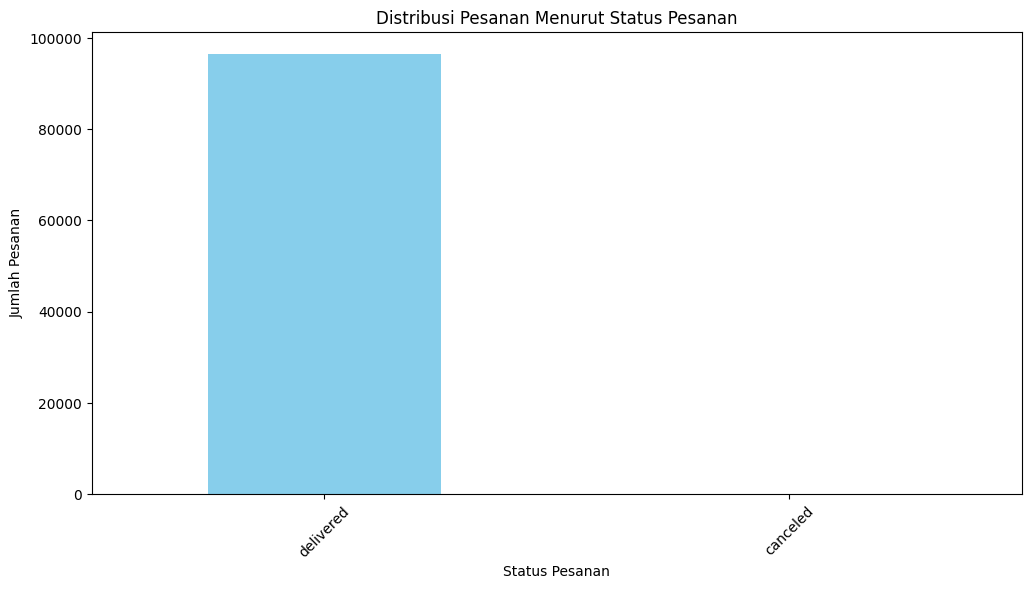

In [11]:
#visualisasi distribusi pesanan menurut status pesanan
plt.figure(figsize=(12, 6))
status_distribution = orders['order_status'].value_counts()
status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Pesanan Menurut Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

**Insight:**

-Distribusi pesanan menunjukkan bahwa negara bagian tertentu, memiliki jumlah pesanan yang lebih tinggi dibandingkan dengan negara bagian lainnya.

### Pertanyaan 2: Bagaimana nilai pesanan rata-rata bervariasi berdasarkan kategori produk?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19124\3742609317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value, y=avg_order_value.index, palette='viridis', legend=False)


SyntaxError: keyword argument repeated: fontsize (3742609317.py, line 26)

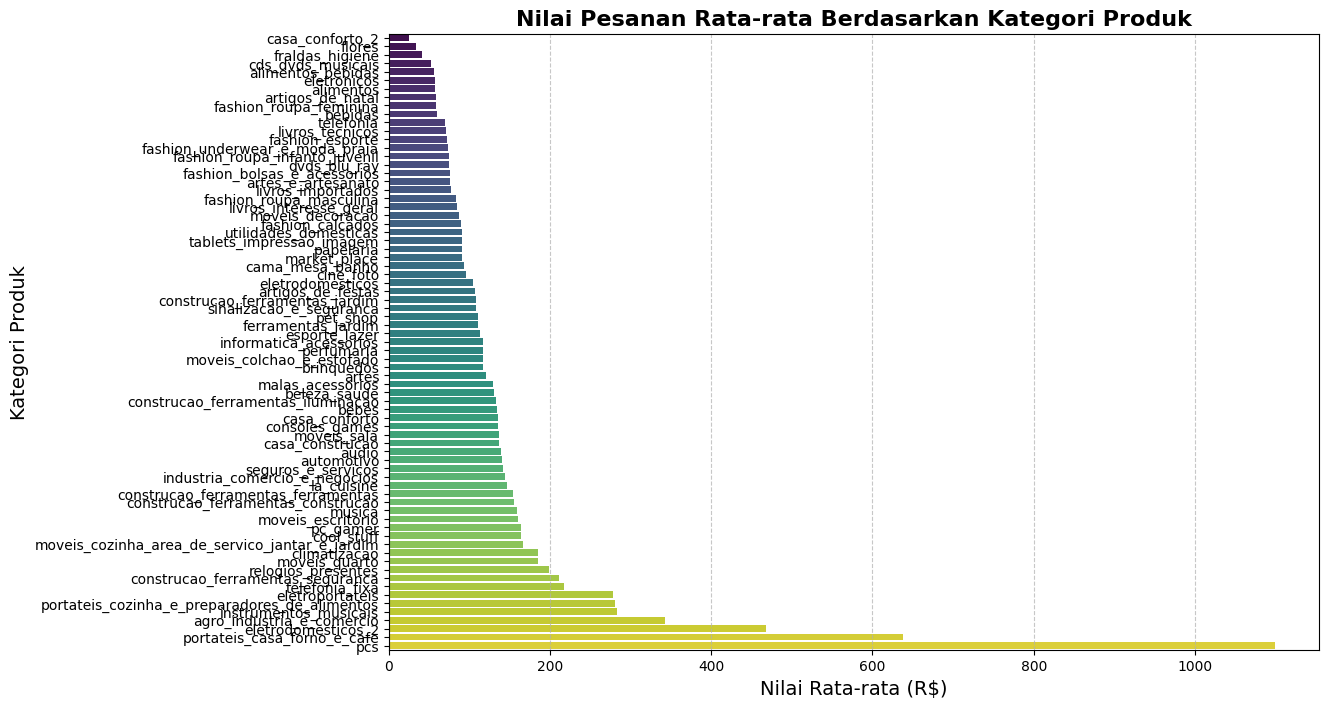

In [30]:
#menggabungkan data
merged_data = order_items.merge(products, on='product_id').merge(orders, on='order_id')

#menghitung nilai rata-rata pesanan berdasarkan kategori produk
avg_order_value = merged_data.groupby('product_category_name')['price'].mean().sort_values()

#mengatur ukuran gambar
plt.figure(figsize=(12, 8))

#menambahkan grafik batang horizontal dengan argumen hue
sns.barplot(x=avg_order_value, y=avg_order_value.index, hue=avg_order_value.index, palette='viridis', legend=False)

#menambahkan judul dan label sumbu
plt.title('Nilai Pesanan Rata-rata Berdasarkan Kategori Produk', fontsize=16, fontweight='bold')
plt.xlabel('Nilai Rata-rata (R$)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.subplots_adjust(top=1) 

#menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='x', linestyle='--', alpha=0.7)

#menampilkan nilai pada setiap batang
for index, value in enumerate(avg_order_value):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, color='black')

#menampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**
- Terdapat variasi yang signifikan dalam nilai pesanan rata-rata berdasarkan kategori produk, dengan kategori tertentu menunjukkan nilai yang lebih tinggi.

### Pertanyaan 3: Bagaimana tren total pendapatan dari waktu ke waktu?

In [25]:
print(orders.columns)
print(orders.head())

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    de

In [26]:
print(orders.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19124\765640615.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = monthly_revenue.resample('M').sum()


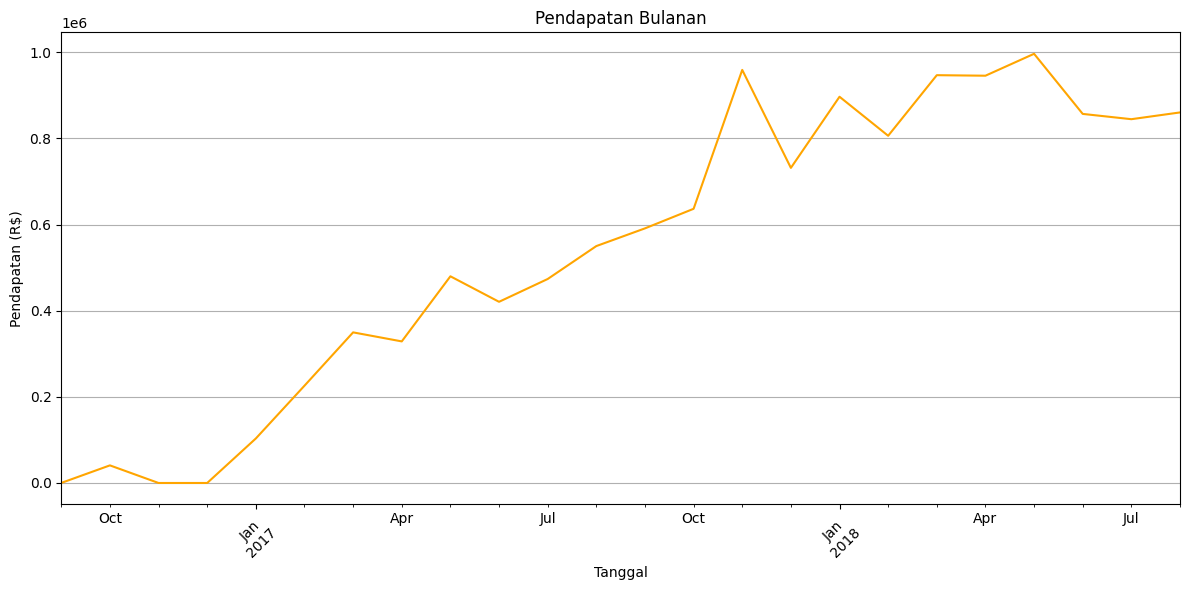

In [27]:
#menghitung pendapatan bulanan & total pendapatan per order_id
monthly_revenue = merged_data.groupby('order_id').agg({'price': 'sum'}).reset_index()

#menggabungkan dengan orders untuk mendapatkan timestamp
monthly_revenue = monthly_revenue.merge(orders[['order_id', 'order_approved_at']], on='order_id')

#mengatur index menggunakan 'order_approved_at'
monthly_revenue['order_approved_at'] = pd.to_datetime(monthly_revenue['order_approved_at'])
monthly_revenue.set_index('order_approved_at', inplace=True)

#resampling untuk menghitung pendapatan bulanan
monthly_revenue = monthly_revenue.resample('M').sum()

#visualisasi pendapatan bulanan
plt.figure(figsize=(12, 6))
monthly_revenue['price'].plot(color='orange')
plt.title('Pendapatan Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Pendapatan (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Tren pendapatan bulanan menunjukkan adanya pola musiman, dengan peningkatan pendapatan yang terlihat pada bulan-bulan tertentu.

### Pertanyaan 4: Metode pembayaran apa yang paling umum digunakan?

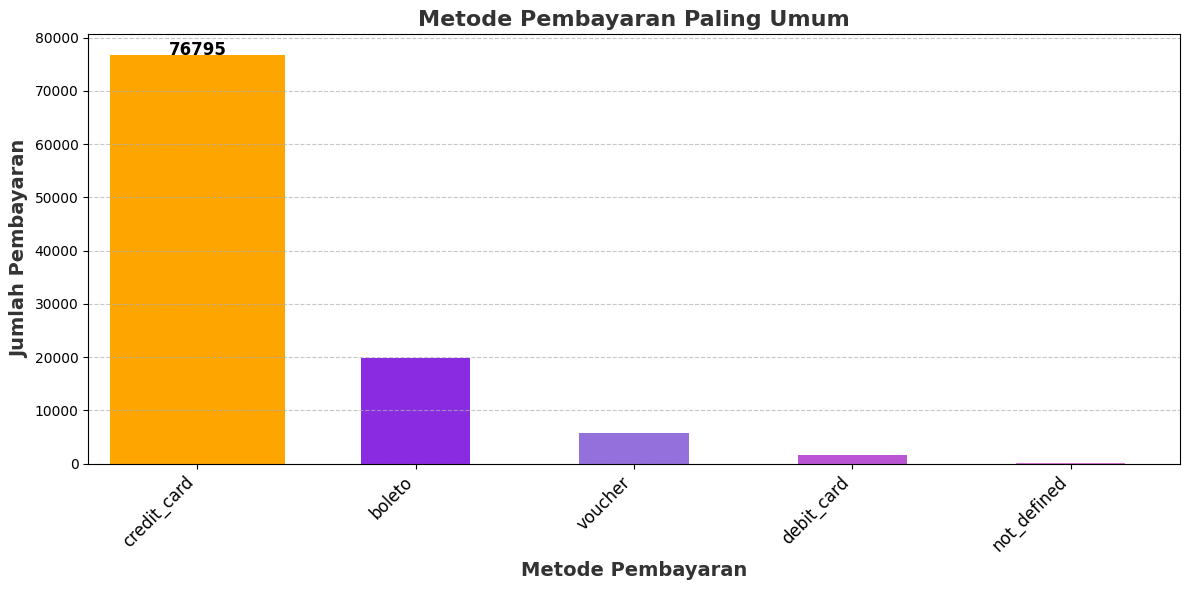

In [28]:
payment_methods = payments['payment_type'].value_counts()

#membuat visualisasi
plt.figure(figsize=(12, 6))

#menggunakan palet warna ungu
purple_palette = ['#6A0EAB', '#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6']  
payment_methods.plot(kind='bar', color=purple_palette)

#menambahkan judul dan label dengan gaya yang konsisten
plt.title('Metode Pembayaran Paling Umum', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Metode Pembayaran', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Jumlah Pembayaran', fontsize=14, fontweight='bold', color='#333333')

#sumbu x
plt.xticks(rotation=45, ha='right', fontsize=12)

#menyoroti bagian tertentu (misalnya metode pembayaran paling umum)
max_payment_method = payment_methods.idxmax()
max_payment_value = payment_methods.max()
plt.bar(max_payment_method, max_payment_value, color='orange')  #menyoroti metode pembayaran paling umum akan berwarna oren

#menambahkan anotasi pada bar yang disorot
plt.text(x=max_payment_method, y=max_payment_value + 5, s=f'{max_payment_value}', 
         ha='center', fontsize=12, color='black', fontweight='bold')

#menambahkan grid untuk membantu pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

#visualisasi
plt.tight_layout()
plt.show()

**Insight:**
- Metode pembayaran yang paling umum digunakan adalah kartu kredit, diikuti oleh boleto, voucher dan transfer bank.

## Analisis Lanjutan (Opsional)

In [29]:
#mencetak kolom yang ada di DataFrame
print(orders.columns)  # Cek kolom yang tersedia

#kolom 'order_approved_at' dalam format datetime
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

#recency: Hitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
orders['last_purchase_date'] = orders['order_approved_at'].max() - orders['order_approved_at']
orders['recency'] = orders['last_purchase_date'].dt.days

#frequency: Hitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
frequency = orders['customer_id'].value_counts()

#cek kolom yang tersedia lagi
print(orders.columns) 
#ganti 'payment_value' dengan nama kolom yang benar jika diperlukan
if 'payment_value' in orders.columns:
    monetary = orders.groupby('customer_id')['payment_value'].sum()
else:
    print("Kolom 'payment_value' tidak ditemukan. Pastikan nama kolom benar.")

#membuat DataFrame RFM
rfm = pd.DataFrame({
    'recency': orders.groupby('customer_id')['recency'].min(),  #mengambil nilai recency minimum
    'frequency': frequency,
    'monetary': monetary if 'payment_value' in orders.columns else 0  #mengatur menjadi 0 jika kolom tidak ada
}).reset_index()

#DataFrame RFM
print(rfm.head())


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'last_purchase_date', 'recency'],
      dtype='object')
Kolom 'payment_value' tidak ditemukan. Pastikan nama kolom benar.
                        customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      287          1         0
1  000161a058600d5901f007fab4c27140      409          1         0
2  0001fd6190edaaf884bcaf3d49edf079      547          1         0
3  0002414f95344307404f0ace7a26f1d5      377          1         0
4  000379cdec625522490c315e70c7a9fb      147          1         0


## Conclusion

- Kesimpulan Pertanyaan 1:
Distribusi pesanan menunjukkan bahwa sebagian besar pesanan berasal dari negara bagian tertentu, dengan SP dan RJ sebagai yang teratas.

- Kesimpulan Pertanyaan 2:
Nilai pesanan rata-rata bervariasi signifikan antara kategori produk, menunjukkan bahwa beberapa kategori lebih menguntungkan daripada yang lain.

- Kesimpulan Pertanyaan 3:
Tren pendapatan bulanan menunjukkan fluktuasi dengan beberapa bulan memiliki pendapatan yang lebih tinggi, menunjukkan adanya pola musiman.

- Kesimpulan Pertanyaan 4:
Metode pembayaran yang paling umum digunakan adalah kartu kredit, yang menunjukkan preferensi pelanggan terhadap metode pembayaran ini.